# CenH3 units analysis

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Merged units size, density
### Boxplot

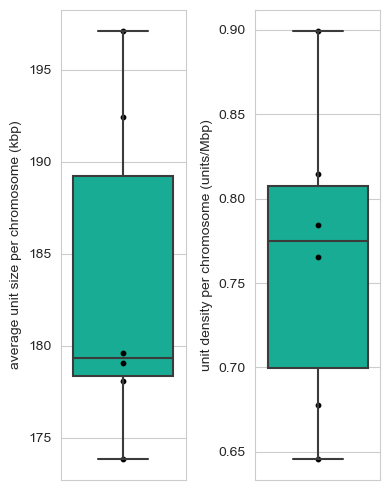

Number of centromeric units: 358
Average unit size: 184.485 kbp
Average unit size per chromosome: 183.371 kbp
Average unit density per chromosome: 0.764 units/Mbp
Range of unit sizes: 1.199 - 2335.364 kbp
Range of average unit sizes per chromosome: 173.866 - 197.100 kbp
Range of unit densities per chromosome: 0.646 - 0.899 units/Mbp
Standard deviation of unit size: 236.450 kbp
Standard deviation of unit density per chromosome: 0.092 units/Mbp
Standard deviation of average unit size per chromosome: 9.183 kbp


In [2]:
# load bed file to dataframe
df = pd.read_csv('data/chip-seq/consensus_peaks/CenH3_150k_merged_units.bed', sep='\t', header=None)
chr_sizes = pd.read_csv('data/chr_sizes/Lsyl_chr_sizes.tsv', sep='\t', header=None)
chr_sizes = chr_sizes.rename(columns={0: 'chr'})

# calculate unit density per chromosome
# count units per chromosome
chr_units = df.groupby(0).size()
# join with chr_sizes
chr_units = chr_units.to_frame().join(chr_sizes.set_index('chr'))
chr_units.rename(columns={0: 'count', 1: 'chr_size'}, inplace=True)
# calculate density in Mb
chr_units['density'] = chr_units['count'] / chr_units['chr_size'] * 1000000

# calculate average unit size per chromosome
# calculate unit size
df['unit_size'] = df[2] - df[1]
# calculate average unit size per chromosome
chr_avg_unit_size = df.groupby(0)['unit_size'].mean()
# join with chr_units
chr_units = chr_units.join(chr_avg_unit_size)
chr_units.rename(columns={'unit_size': 'avg_unit_size'}, inplace=True)
# calculate average unit size in kb
chr_units['avg_unit_size'] = chr_units['avg_unit_size'] / 1000

# create boxplots of unit size per chromosome and unit density per chromosome
# put them in one figure
sns.set_style("whitegrid")
# Set the default font family to Arial
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 5))
# unit size
sns.boxplot(chr_units['avg_unit_size'], ax=ax1, color='#00c5a4ff', flierprops = dict(marker='o', fillstyle='none'))
ax1.set_ylabel('average unit size per chromosome (kbp)')
ax1.set_xticklabels('')
# add points for each chromosome
for i, chr in enumerate(chr_units.index):
    ax1.scatter(0, chr_units.loc[chr, 'avg_unit_size'],color='black', s=10)
# unit density
sns.boxplot(chr_units['density'], ax=ax2, color='#00c5a4ff', flierprops = dict(marker='o', fillstyle='none'))
ax2.set_ylabel('unit density per chromosome (units/Mbp)')
ax2.set_xticklabels('')
# add points for each chromosome
for i, chr in enumerate(chr_units.index):
    ax2.scatter(0, chr_units.loc[chr, 'density'],color='black', s=10)
# save figure
plt.tight_layout()
plt.savefig('data/figures/centromeric_units.svg', dpi=300, bbox_inches='tight')
plt.show()

# average unit size and density
number_of_units = df.shape[0]
avg_unit_size = df['unit_size'].mean() / 1000
avg_unit_density = number_of_units / chr_sizes[1].sum() * 1000000

# range of unit sizes and densities
min_unit_size = df['unit_size'].min() / 1000
max_unit_size = df['unit_size'].max() / 1000
min_unit_density = chr_units['density'].min()
max_unit_density = chr_units['density'].max()

# standard deviation of unit size and density
std_unit_size = df['unit_size'].std() / 1000
std_unit_density = chr_units['density'].std()

# average unit size per chromosome
chr_avg_unit_size = chr_units['avg_unit_size'].mean()
min_chr_avg_unit_size = chr_units['avg_unit_size'].min()
max_chr_avg_unit_size = chr_units['avg_unit_size'].max()
std_chr_avg_unit_size = chr_units['avg_unit_size'].std()

print('Number of centromeric units: {}'.format(number_of_units))
# display average unit size and density with 3 decimal places
print('Average unit size: {:.3f} kbp'.format(avg_unit_size))
print('Average unit size per chromosome: {:.3f} kbp'.format(chr_avg_unit_size))
print('Average unit density per chromosome: {:.3f} units/Mbp'.format(avg_unit_density))
print('Range of unit sizes: {:.3f} - {:.3f} kbp'.format(min_unit_size, max_unit_size))
print('Range of average unit sizes per chromosome: {:.3f} - {:.3f} kbp'.format(min_chr_avg_unit_size, max_chr_avg_unit_size))
print('Range of unit densities per chromosome: {:.3f} - {:.3f} units/Mbp'.format(min_unit_density, max_unit_density))
print('Standard deviation of unit size: {:.3f} kbp'.format(std_unit_size))
print('Standard deviation of unit density per chromosome: {:.3f} units/Mbp'.format(std_unit_density))
print('Standard deviation of average unit size per chromosome: {:.3f} kbp'.format(std_chr_avg_unit_size))



### Barplots

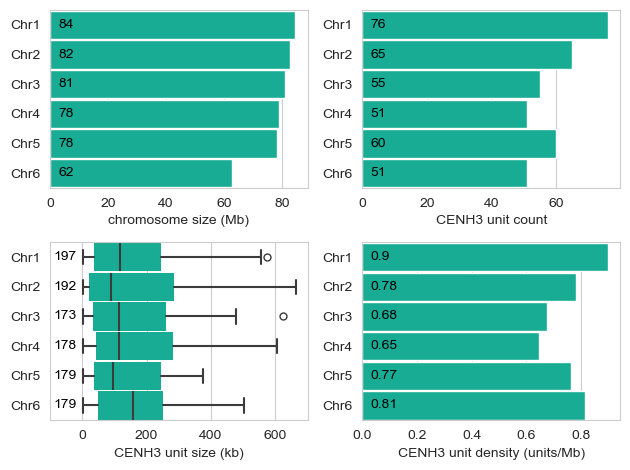

In [3]:
# rename chromosomes
row_names = {'HiC_scaffold_1': 'Chr5',
             'HiC_scaffold_2': 'Chr3',
             'HiC_scaffold_3': 'Chr2',
             'HiC_scaffold_4': 'Chr6',
             'HiC_scaffold_5': 'Chr4',
             'HiC_scaffold_6': 'Chr1',}
chr_renamed = chr_units.rename(index=row_names, inplace=False)
# reorder chromosomes
row_order = ['Chr1', 'Chr2', 'Chr3', 'Chr4', 'Chr5', 'Chr6']
chr_renamed = chr_renamed.reindex(row_order)
# divide chromosome size by 1e6
chr_renamed['chr_size'] = chr_renamed['chr_size'] / 1000000

# create barplots of chromosome size, unit count, average unit size and unit density
# put them in one figure
sns.set_style("whitegrid")
# Set the default font family to Arial
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

for ax in fig.axes:
    ax.set_ylabel('')
# chromosome size
sns.barplot(y=chr_renamed.index, x=chr_renamed['chr_size'], ax=ax1, color='#00c5a4ff', width=0.95)
ax1.set_xlabel('chromosome size (Mb)')
# add values rounded to zero decimal digits to bars
for i, chr in enumerate(chr_renamed.index):
    max_value = chr_renamed['chr_size'].max()
    ax1.text(x=max_value/30, y=i, s=int(chr_renamed.loc[chr, 'chr_size']), color='black', ha='left', va='center')
# unit count
sns.barplot(y=chr_renamed.index, x=chr_renamed['count'], ax=ax2, color='#00c5a4ff', width=0.95)
# add values 
for i, chr in enumerate(chr_renamed.index):
    max_value = chr_renamed['count'].max()
    ax2.text(x=max_value/30, y=i, s=chr_renamed.loc[chr, 'count'], color='black', ha='left', va='center')
ax2.set_xlabel('CENH3 unit count')


# unit sizes grouped by chromosome
## create a new column new_names with renamed chromosomes
df['new_names'] = df[0].map(row_names)

# reorder
df_renamed = df.reindex(columns=['new_names', 'unit_size'])
df_renamed['unit_size'] = df_renamed['unit_size'] / 1000

sns.boxplot(y='new_names', x='unit_size', data=df_renamed,
             ax=ax3, color='#00c5a4ff', 
             flierprops = dict(marker='o', fillstyle='none'),
             order=row_order, width=0.95, boxprops=dict(edgecolor='none'))
# order boxes by chromosome, not just labels
for i, chr in enumerate(chr_renamed.index):
    max_value = chr_renamed['avg_unit_size'].max()
    ax3.text(x=-90, y=i, s=int(chr_renamed.loc[chr, 'avg_unit_size']), color='black', ha='left', va='center')
ax3.set_xlabel('CENH3 unit size (kb)')
# outlier values beyond x lim are not shown
ax3.set_xlim(-100,700)
# unit density
sns.barplot(y=chr_renamed.index, x=chr_renamed['density'], ax=ax4, color='#00c5a4ff', width=0.95)
ax4.set_xlabel('CENH3 unit density (units/Mb)')
for i, chr in enumerate(chr_renamed.index):
    max_value = chr_renamed['density'].max()
    ax4.text(x=max_value/30, y=i, s=round(chr_renamed.loc[chr, 'density'], 2), color='black', ha='left', va='center')
for ax in fig.axes:
    ax.set_ylabel('')
# save figure
plt.tight_layout()
plt.savefig('data/figures/centromeric_units_barplot.svg', dpi=300, bbox_inches='tight')


## Lusy1, Lusy2, noncentromeric CENH3 units
```bash
# non satellite arrays - 33
bedtools subtract -A -a data/chip-seq/consensus_peaks/CenH3_150k_merged_units.bed -b data/satellites/Luzula_sylvatica_all_sat.bed | wc -l

# lusy1 arrays - 232
bedtools intersect -wa -a data/chip-seq/consensus_peaks/CenH3_150k_merged_units.bed -b data/satellites/Lsylv_Lusy1-124.bed | sort | uniq | wc -l

# lusy2 arrays - 96
bedtools intersect -wa -a data/chip-seq/consensus_peaks/CenH3_150k_merged_units.bed -b data/satellites/Lsylv_Lusy2-174.bed | sort | uniq | wc -l
```